# TMDB Movie

This document explores a TMDB 5000 Movie Dataset.

In [1]:
# import all packages and set plots to be embedded inlinefrom wordcloud import WordCloud, STOPWORDS 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

%matplotlib inline

## Introduction 

The main purpose of this investigation is to find what makes the movie success, in other words, 
what can effect on the Revenue and the Rating of the movie, are the most popular movies make more money than others?
does the actor effects on the movie popularity, and so on.

## 1. Extract the Data 

In [2]:
# load in the dataset into a pandas dataframe, print statistics
credits = pd.read_csv("tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb_5000_movies.csv")

### brief looking inside the datasets

In [3]:
credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [4]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

## 2. Explore the Data 

In [5]:
# View the first 5 columns of credits dataset
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


The first dataset contains 4 features:
<li>movie_id - A unique identifier for each movie.</li>
<li>cast - The name of lead and supporting actors.</li>
<li>crew - The name of Director, Editor, Composer, Writer etc.</li>


In [6]:
# View the first 5 columns of movies data set
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


The second dataset contains the following features:-
<li>budget - The budget in which the movie was made.</li>
<li>genre - The genre of the movie, Action, Comedy ,Thriller etc.</li>
<li>homepage - A link to the homepage of the movie.</li>
<li>id - This is infact the movie_id as in the first dataset.</li>
<li>keywords - The keywords or tags related to the movie.</li>
<li>original_language - The language in which the movie was made.</li>
<li>original_title - The title of the movie before translation or adaptation.</li>
<li>overview - A brief description of the movie.</li>
<li>popularity - A numeric quantity specifying the movie popularity.</li>
<li>production_companies - The production house of the movie.</li>
<li>production_countries - The country in which it was produced.</li>
<li>release_date - The date on which it was released.</li>
<li>revenue - The worldwide revenue generated by the movie.</li>
<li>runtime - The running time of the movie in minutes.</li>
<li>status - "Released" or "Rumored".</li>
<li>tagline - Movie's tagline.</li>
<li>title - Title of the movie.</li>
<li>vote_average - average ratings the movie recieved.</li>
<li>vote_count - the count of votes recieved.</li>

#### Join the two datasets into one dataset

In [7]:
# Join the two datasets into one dataset
ddf = pd.concat([credits, movies], axis=1, join='outer')

In [8]:
# View the first five columns of the new dataset
ddf.head()

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### The shape of the dataset

In [9]:
# The shape of the dataset
ddf.shape

(4803, 24)

The new dataset contains 24 columns ans 4803 rows

##### descriptive statistics for numeric variables


In [10]:
# descriptive statistics for numeric variables
ddf.describe()

,movie_id,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [11]:
# check the type of the data 
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
movie_id                4803 non-null int64
title                   4803 non-null object
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null ob

In [12]:
# See the number of unique values in each columns
ddf.nunique()

movie_id                4803
title                   4800
cast                    4761
crew                    4776
budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

In [13]:
# Check dublicated values
ddf.duplicated().sum()

0

There is no dublicated values

In [14]:
# Check for null values
ddf.isna().sum()

movie_id                   0
title                      0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

There is two columns that has missing values : homepage and tageline, <br>
They are not important in my exploration for now so I am going to drop them anyway.

## 3- Cleaning data

We are going to do alot of processes on the dataset, so I prefer to copy it in another dataframe  

In [15]:
# Copy the original dataset into another one.
df = ddf

In [16]:
# we have duplicated column "Title" which we donot need.
# Delete the duplicated columns
df = df.reset_index().T.drop_duplicates().T

In [17]:
# check if the column already deleted
df

,index,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238
4799,4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,[],en,...,[],[],2011-12-26,0,85,[],Released,A newlywed couple's honeymoon is upended by th...,5.9,5
4800,4800,231617,"Signed, 

In [18]:
# we are going to drop the two columns which contains the missing data, and also columnsthat we donot need in our investigation
df.drop(columns=["homepage", "tagline", "index","keywords", "spoken_languages", "status" ], axis = 1, inplace = True)

Now, we need to extract required information from columns: cast, crew, genres, production_countries,  Which we are interesting in.<br>
But first, we have to convert this columns from json to string

In [19]:
# we will use json.loads to convert it to object
df['crew'] = df['crew'].apply(json.loads)
df['cast'] = df['cast'].apply(json.loads)
df['production_countries'] = df['production_countries'].apply(json.loads)
df['production_companies'] = df['production_companies'].apply(json.loads)

In [20]:
# A function to extract the director name 
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan
df['director'] = df['crew'].apply(get_director)

In [21]:
# Function to get the name from the dictionary
def get_name(x):
    for i in x:
        return i['name']

In [22]:
# apply get_name function at 'cast' column to get the actor name
df['actor'] = df['cast'].apply(get_name)

In [23]:
# apply get_name function at "production_country" column to get the country name
df["production_country"] = df["production_countries"].apply(get_name)

In [24]:
# apply get_name function at "production_company" column to get the company name
df["production_company"] = df["production_companies"].apply(get_name)

In [25]:
# Delete unneeded columns 
df.drop(columns = ["cast", "crew", "production_countries", "production_companies", "overview","original_title"], inplace = True)

In [26]:
# Extract the released year from the released date
df["release_year"] = pd.DatetimeIndex(df["release_date"]).year

In [27]:
# The numerical values changed to object, let's return it to float.
df['budget'] = df['budget'].replace('?', 0.0)
df['budget'] = df['budget'].astype(float)

df['revenue'] = df['revenue'].replace('?', 0.0)
df['revenue'] = df['revenue'].astype(float)

df['popularity'] = df['popularity'].replace('?', 0.0)
df['popularity'] = df['popularity'].astype(float)

df['revenue'] = df['revenue'].replace('?', 0.0)
df['revenue'] = df['revenue'].astype(float)

df['vote_average'] = df['vote_average'].replace('?', 0.0)
df['vote_average'] = df['vote_average'].astype(float)

df['vote_count'] = df['vote_count'].replace('?', 0.0)
df['vote_count'] = df['vote_count'].astype(float)

## 4- Exploratory Data Analysis

### Univariate Analysis:

### Q1: who is the actor with the largest number of movies

In [28]:
# We are going to create a dataframe with actors and their movies number.
most_actor_appearing = pd.DataFrame(df['actor'].value_counts())
most_actor_appearing.rename(columns = {"actor" : "movies_num"}, inplace = True)
most_actor_appearing['actor'] = most_actor_appearing.index
most_actor_appearing.reset_index(drop= True, inplace= True) 

In [29]:
most_actor_appearing

,movies_num,actor
0,30,Robert De Niro
1,30,Bruce Willis
2,29,Nicolas Cage
3,27,Johnny Depp
4,26,Denzel Washington
...,...,...
2090,1,Marisa Coughlan
2091,1,Will Shortz
2092,1,Vanessa Hudgens
2093,1,Genevieve Bachman


It seems that Robert De Niro has the largest number of movies, Followed by Bruce Willis and both have 30 movies,<br>
Let's see how this look like in graph.

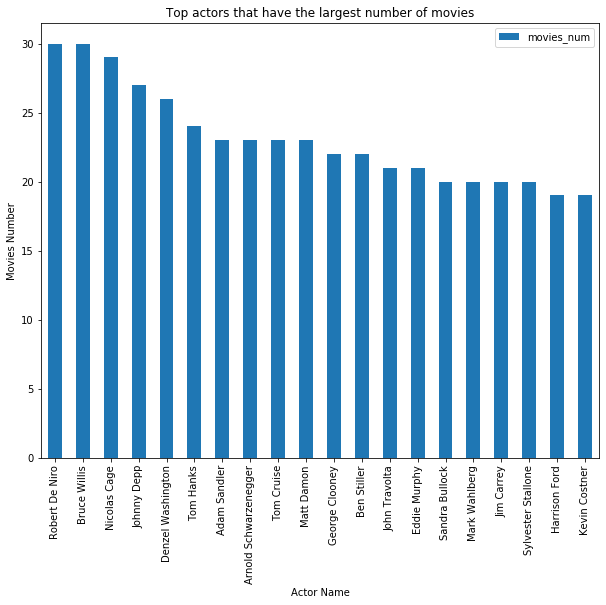

In [30]:
# plot the top 20 actors that have the largest number of movies
most_actor_appearing.iloc[:20].plot(kind = 'bar' ,x ='actor', y ='movies_num', figsize=(10,8));
plt.xlabel("Actor Name");
plt.ylabel("Movies Number");
plt.title("Top actors that have the largest number of movies");

### Q2: What are the Top production Companies with higher number of Release?


In [31]:
# Count the number of movies for each company 
company_count = df['production_company'].value_counts()
company_count

Paramount Pictures                        281
Universal Pictures                        260
Columbia Pictures                         200
Twentieth Century Fox Film Corporation    177
New Line Cinema                           157
                                         ... 
Tokuma Shoten                               1
Incorporated Television Company             1
Becker International                        1
Moctesuma Esparza Productions               1
Gospel of John Ltd.                         1
Name: production_company, Length: 1313, dtype: int64

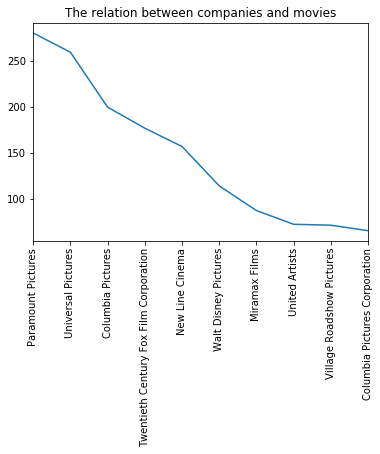

In [32]:
# plot the relation between companies and movies
company_count[:10].plot();
plt.xticks(rotation=90);
plt.title("The relation between companies and movies");

Paramount Pictures Company is the top company that makes movies with 281 movie, magnificen!!!

### Q3: What are the TopCountries with higher number of Release?

In [33]:
# Count the number of movies for each country 
country_count = df['production_country'].value_counts()
country_count

United States of America    3102
United Kingdom               374
Canada                       220
Germany                      200
France                       174
                            ... 
Guadaloupe                     1
Libyan Arab Jamahiriya         1
Fiji                           1
Cameroon                       1
Panama                         1
Name: production_country, Length: 70, dtype: int64

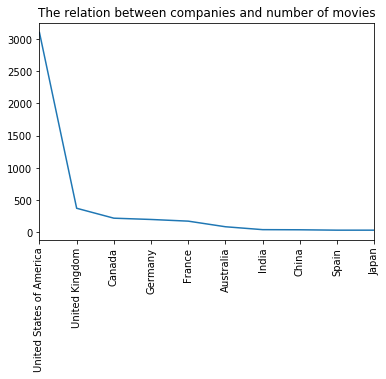

In [34]:
# plot the relation between companies and number of movies
country_count[:10].plot();
plt.xticks(rotation=90);
plt.title("The relation between companies and number of movies");

United States of America is the top country which made 3102


### Bivariate Analysis:

### Q1: Which year has the highest release of movies?


first and last year in the dataset

In [35]:
# Get the first and last year in the dataset
print(df['release_year'].max(),df['release_year'].min())

2017.0 1916.0


the number of movies in each year

In [36]:
# make group for each year and count the number of movies in each year
data = df.groupby('release_year').count()["movie_id"]
data

release_year
1916.0      1
1925.0      1
1927.0      1
1929.0      2
1930.0      1
         ... 
2013.0    231
2014.0    238
2015.0    216
2016.0    104
2017.0      1
Name: movie_id, Length: 90, dtype: int64

The year with the highest released movies

In [37]:
#The year with the highest released movies 
data.idxmax()

2009.0

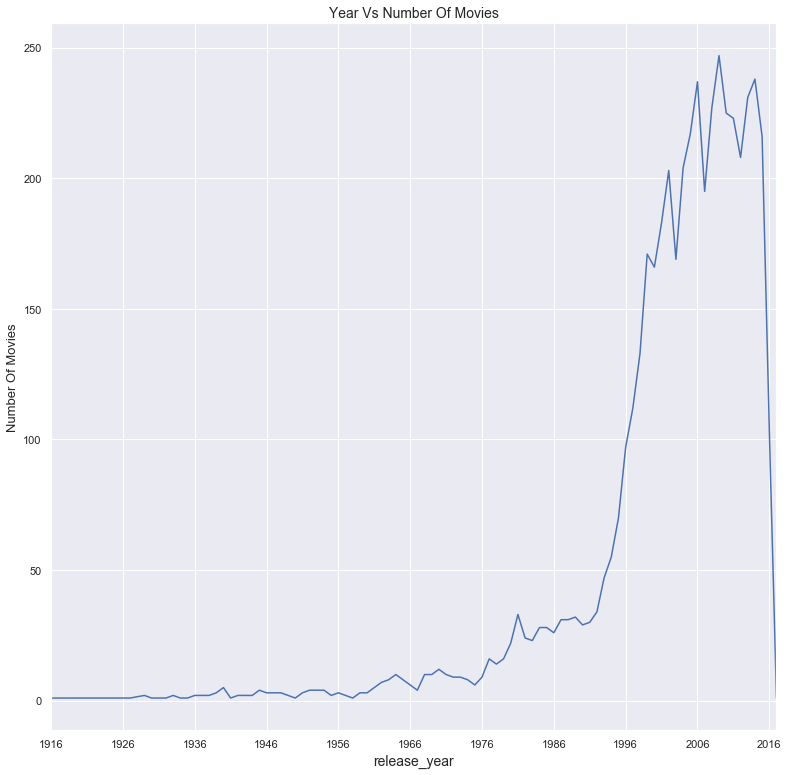

In [38]:
# plot the relation between year and movies
# data.plot(xticks = np.arange(1916,2017,20));
# data.plot(xticks = np.arange(1916,2017,10));
sns.set(rc={'figure.figsize':(13,13)})
#set the figure size and labels
plt.title("Year Vs Number Of Movies",fontsize = 14);
plt.xlabel('Release year',fontsize = 14);
plt.ylabel('Number Of Movies',fontsize = 13);
data.plot(xticks = np.arange(1916,2017,10));


It seems that release of movies increases by year, The year with the highest released movies is 2009 

### Q2: What is the highest  budget movies


In [39]:
# Plot the heighest 30 movie budget
# First we sort the 'budget' column in descending order, and store them in new dataframe
sorted_budget = pd.DataFrame(df['budget'].sort_values(ascending = False))
sorted_budget['title'] = df['title']
sorted_budget

,budget,title
17,380000000.0,Pirates of the Caribbean: On Stranger Tides
1,300000000.0,Pirates of the Caribbean: At World's End
7,280000000.0,Avengers: Age of Ultron
10,270000000.0,Superman Returns
4,260000000.0,John Carter
...,...,...
3178,0.0,The Savages
3179,0.0,Chasing Papi
3183,0.0,The Ultimate Gift
3187,0.0,Hamlet 2


The movie with the Largest budget is 'Pirates of the Caribbean: On Stranger Tides', let's graph the result.

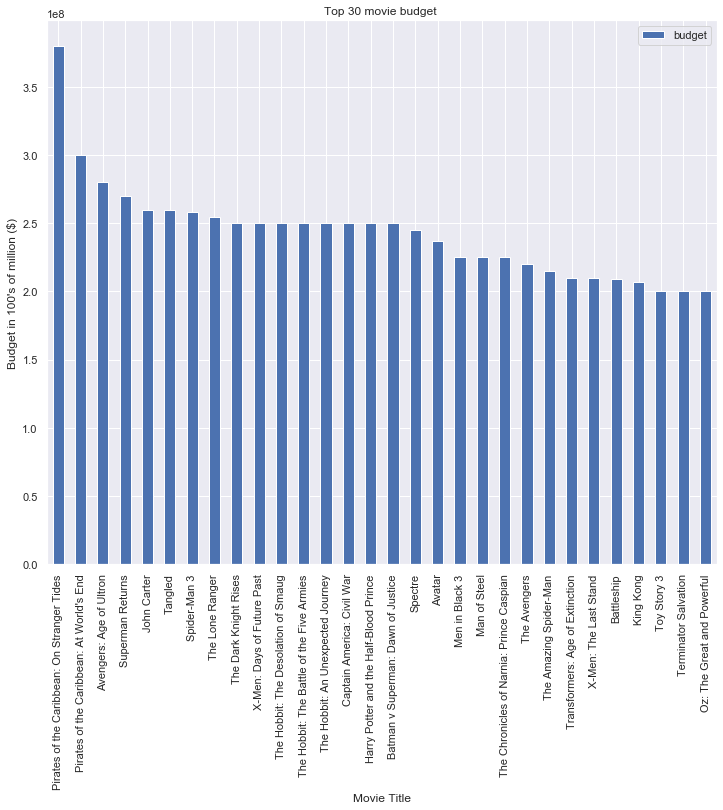

In [40]:
# We plot the top 30 movies budget
sorted_budget.iloc[:30].plot(x = 'title', y = 'budget', kind= 'bar', figsize=(12,10));
plt.title("Top 30 movie budget ");
plt.xlabel("Movie Title")
plt.ylabel('Budget in 100\'s of million ($)');

### Q3: Which movie has the maximum popularity?

In [41]:
# Create a dataframe with the most popular movies
sorted_popularity = pd.DataFrame(df['popularity'].sort_values(ascending = False))
sorted_popularity['title'] = df['title']
sorted_popularity

,popularity,title
546,875.581305,Minions
95,724.247784,Interstellar
788,514.569956,Deadpool
94,481.098624,Guardians of the Galaxy
127,434.278564,Mad Max: Fury Road
...,...,...
4625,0.001389,Midnight Cabaret
4118,0.001186,Hum To Mohabbat Karega
4727,0.001117,Penitentiary
3361,0.000372,Alien Zone


It seems that 'Minions' is most popular movie.

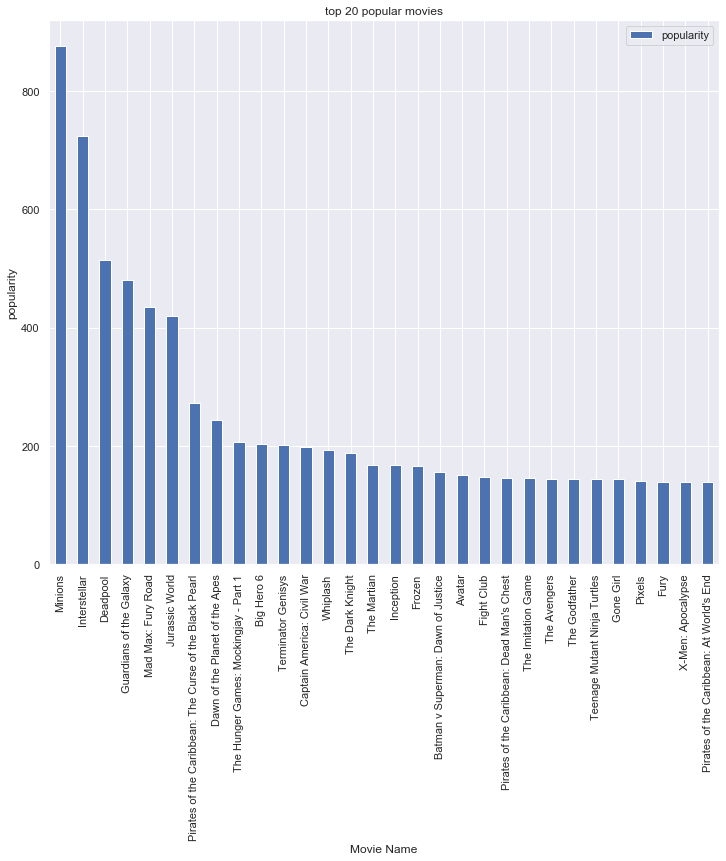

In [42]:
# Plot the top 30 popular movies
sorted_popularity.iloc[:30].plot(x="title", y="popularity", kind="bar",figsize=(12,10));
plt.xlabel("Movie Name");
plt.ylabel("popularity");
plt.title("top 20 popular movies");

### Q4: Which Directors are most successful (Revenue\ Rating)?

The directors are a strong factor in movies success, we will see who the top directors are.

In [43]:
# Create a dataframe with 'director' and 'revenue' columns
director_revenue = df.groupby('director')['revenue'].sum()
director_revenue_df =pd.DataFrame(director_revenue.sort_values(ascending = False))
director_revenue_df['director'] = director_revenue_df.index
director_revenue_df.reset_index(drop= True, inplace= True) 
director_revenue_df.head(10)

,revenue,director
0,9.147393e+09,Steven Spielberg
1,6.498643e+09,Peter Jackson
2,5.883569e+09,James Cameron
3,5.832525e+09,Michael Bay
4,4.227483e+09,Christopher Nolan
5,3.725632e+09,Chris Columbus
6,3.590622e+09,Robert Zemeckis
7,3.339114e+09,George Lucas
8,3.337418e+09,Tim Burton
9,3.189558e+09,Ridley Scott


Looks like Steven Spielberg is the most succesful director acording to the movies revenue,<br>
We are going to plot it and see how it looks.

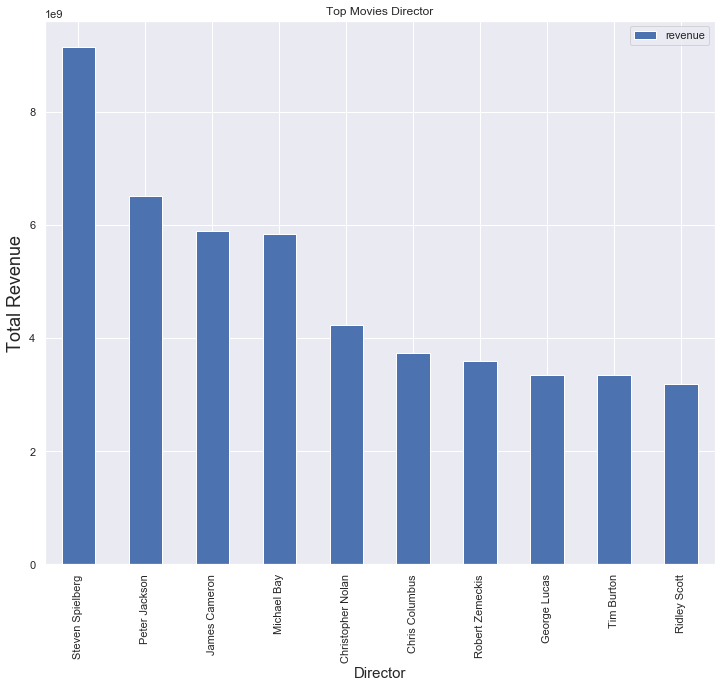

In [44]:
director_revenue_df.iloc[:10].plot(x="director", y="revenue", kind="bar",figsize=(12,10));
plt.ylabel("Total Revenue", fontsize=18);
plt.xlabel("Director", fontsize=15);
plt.title("Top Movies Director");

### Q5: Which movies have the highest vote_average? doese vote_average associated with any other movie properties? 

In [45]:
# Create a dataframe with the most vote_average
sorted_vote_average = pd.DataFrame(df['vote_average'].sort_values(ascending = False))
sorted_vote_average['title'] = df['title']
sorted_vote_average

,vote_average,title
4662,10.0,Little Big Top
4247,10.0,Me You and Five Bucks
4045,10.0,"Dancer, Texas Pop. 81"
3519,10.0,Stiff Upper Lips
3992,9.5,Sardaarji
...,...,...
4118,0.0,Hum To Mohabbat Karega
4293,0.0,The Algerian
4653,0.0,Rust
4305,0.0,Down & Out With The Dolls


The top three movies according to voting are: Little Big Top, Me You and Five Bucks, Dancer, Texas Pop. 81

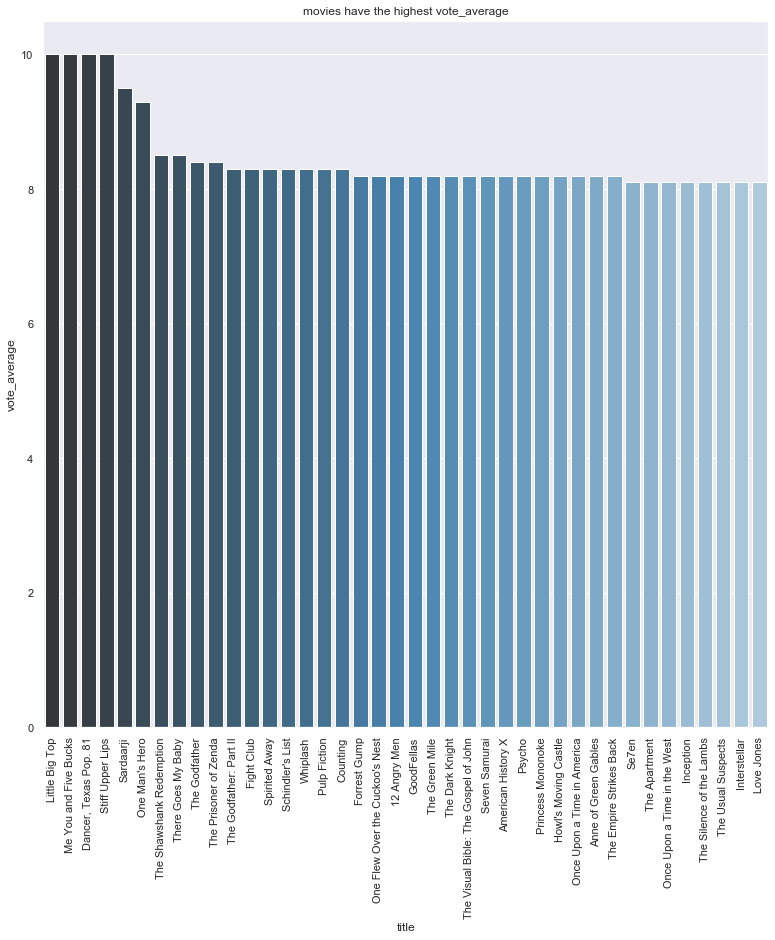

In [46]:
# plot top according to voting
vote_20 = sorted_vote_average[:40]
ax = sns.barplot(x="title", y="vote_average", data=vote_20,
                 palette="Blues_d")
sns.set(rc={'figure.figsize':(8,8)})
plt.xticks(rotation=90);
plt.title("movies have the highest vote_average");

In [47]:
sorted_vote_average['vote_average'].value_counts()

6.0    216
6.5    216
6.7    213
6.3    207
6.1    201
      ... 
2.7      1
1.9      1
2.4      1
9.3      1
2.2      1
Name: vote_average, Length: 71, dtype: int64

The rate that is most common is 6.5 and 6.5

### Multivariate Analysis:

### Q1: What is the relation between the actor appearence and the movie and it's popularity?


In [48]:
actor_movie_popularity = pd.DataFrame(sorted_popularity['popularity'])
actor_movie_popularity = sorted_popularity.rename(columns = {"movie popularity" : 'popularity'})
actor_movie_popularity['actor'] = most_actor_appearing['actor']
actor_movie_popularity

,popularity,title,actor
546,875.581305,Minions,Radha Mitchell
95,724.247784,Interstellar,Tim Allen
788,514.569956,Deadpool,Belén Rueda
94,481.098624,Guardians of the Galaxy,Val Kilmer
127,434.278564,Mad Max: Fury Road,Daniel Radcliffe
...,...,...,...
4625,0.001389,Midnight Cabaret,NaN
4118,0.001186,Hum To Mohabbat Karega,NaN
4727,0.001117,Penitentiary,NaN
3361,0.000372,Alien Zone,NaN


From this results, It seems that the actor name doesnot affect on movies popularity, but let's see how it looks on Graphs

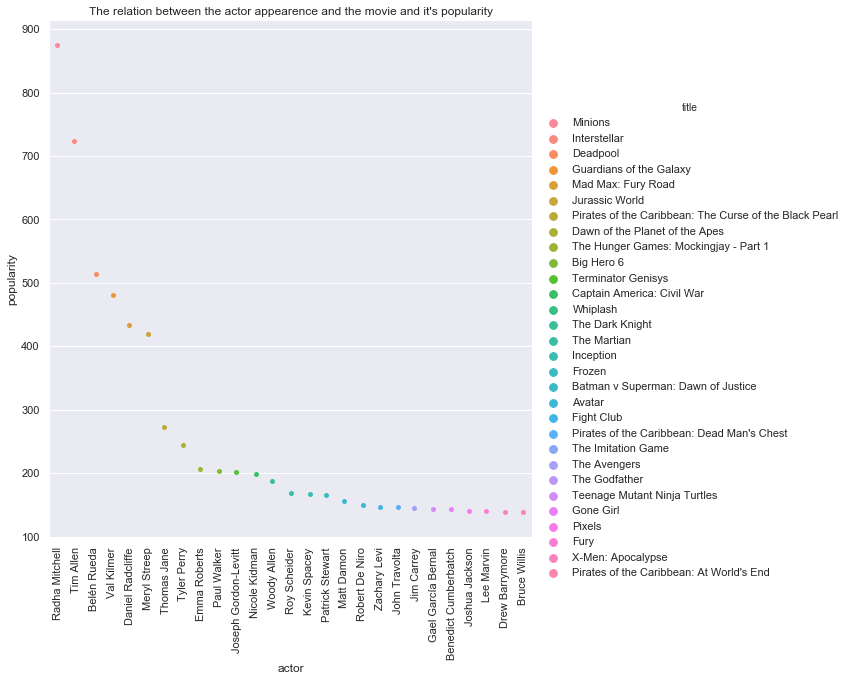

In [49]:
mdata = actor_movie_popularity.iloc[:30];
sns.catplot(x = 'actor', y = 'popularity', hue = 'title', data=mdata, height = 8);
plt.xticks(rotation=90);
plt.title("The relation between the actor appearence and the movie and it's popularity");

### Q2: Movies with Longest and Shortest Runtime? Is there a Relation between Runtime and Rating?

In [50]:
#find the movie with longest and shortest runtime.
df['runtime'] = df['runtime'].replace(0,np.NAN)
print(df['runtime'].max(),df['runtime'].min())

338.0 14.0


It's interesting, the longest run time is 338 mins, which is about 5.6 hrs and the shortest is 14 mins.<br>
Let's see what are these movies and plot them.

In [51]:
# We will create a dataframe with runtime and title and vote_average
# because I am interested in knowing if the runtime effect on vote_average
sorted_runtime = pd.DataFrame(df['runtime'].sort_values(ascending = False))
sorted_runtime['title'] = df['title']
sorted_runtime['vote_average'] = df['vote_average']
sorted_runtime['popularity'] = df['popularity']
sorted_runtime

,runtime,title,vote_average,popularity
2384,338.0,Carlos,6.7,1.138383
2631,276.0,The Company,7.0,1.485324
1922,254.0,Gettysburg,6.6,5.529035
1125,248.0,Cleopatra,6.7,13.244365
2373,242.0,Hamlet,7.3,9.814785
...,...,...,...,...
4633,NaN,Death Calls,0.0,0.005883
4657,NaN,UnDivided,0.0,0.010607
4658,NaN,The Frozen,4.2,1.084387
4662,NaN,Little Big Top,10.0,0.092100


In [52]:
# See what is common between the top vote_average movies
sorted_runtime.sort_values('vote_average',ascending = False)

,runtime,title,vote_average,popularity
4247,90.0,Me You and Five Bucks,10.0,0.094105
3519,99.0,Stiff Upper Lips,10.0,0.356495
4045,97.0,"Dancer, Texas Pop. 81",10.0,0.376662
4662,NaN,Little Big Top,10.0,0.092100
3992,NaN,Sardaarji,9.5,0.296981
...,...,...,...,...
4626,98.0,Anderson's Cross,0.0,0.006323
4309,98.0,The Blade of Don Juan,0.0,0.021678
4708,98.0,Heroes of Dirt,0.0,0.076647
4051,90.0,8 Days,0.0,0.015295


In [53]:
# See what is common between the top popular movies
sorted_runtime.sort_values('popularity',ascending = False)

,runtime,title,vote_average,popularity
546,91.0,Minions,6.4,875.581305
95,169.0,Interstellar,8.1,724.247784
788,108.0,Deadpool,7.4,514.569956
94,121.0,Guardians of the Galaxy,7.9,481.098624
127,120.0,Mad Max: Fury Road,7.2,434.278564
...,...,...,...,...
4625,94.0,Midnight Cabaret,0.0,0.001389
4118,NaN,Hum To Mohabbat Karega,0.0,0.001186
4727,99.0,Penitentiary,4.9,0.001117
3361,90.0,Alien Zone,4.0,0.000372


The movie that has the largest runtime "carlos" doesnot have a little average, but it is also not large,<br>
Same with popularity.

In [54]:
# Convert runtime to hours so it looks more pretty to plot
sorted_runtime['runtime'] = sorted_runtime['runtime']/60

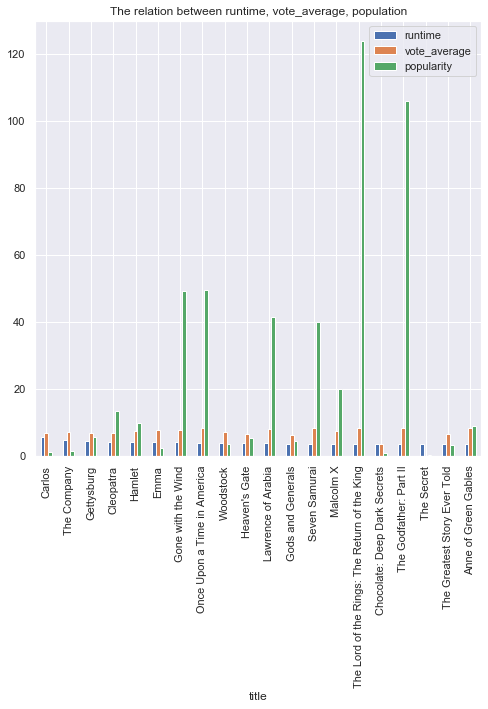

In [55]:
# plot the relation between runtime, vote_average, population
sorted_runtime1=sorted_runtime[:20]
sorted_runtime1.plot(x='title',kind="bar")
plt.xticks();
plt.title("The relation between runtime, vote_average, population");

From the information above, it doesnot seem that Poplution, Rate_average and Runtime strongly depends on each other.

### Q3: Which countries that make most Popular Movies?

In [56]:
# USe the 'sorted_popularity' dataframe we created before and find the country with most popular movies
sorted_popularity['country'] = df["production_country"]
sorted_popularity

,popularity,title,country
546,875.581305,Minions,United States of America
95,724.247784,Interstellar,Canada
788,514.569956,Deadpool,United States of America
94,481.098624,Guardians of the Galaxy,United Kingdom
127,434.278564,Mad Max: Fury Road,Australia
...,...,...,...
4625,0.001389,Midnight Cabaret,None
4118,0.001186,Hum To Mohabbat Karega,None
4727,0.001117,Penitentiary,None
3361,0.000372,Alien Zone,United States of America


In [57]:
df["production_country"].value_counts()

United States of America    3102
United Kingdom               374
Canada                       220
Germany                      200
France                       174
                            ... 
Guadaloupe                     1
Libyan Arab Jamahiriya         1
Fiji                           1
Cameroon                       1
Panama                         1
Name: production_country, Length: 70, dtype: int64

United States of America is the country made 'Minions', which is most popular. 

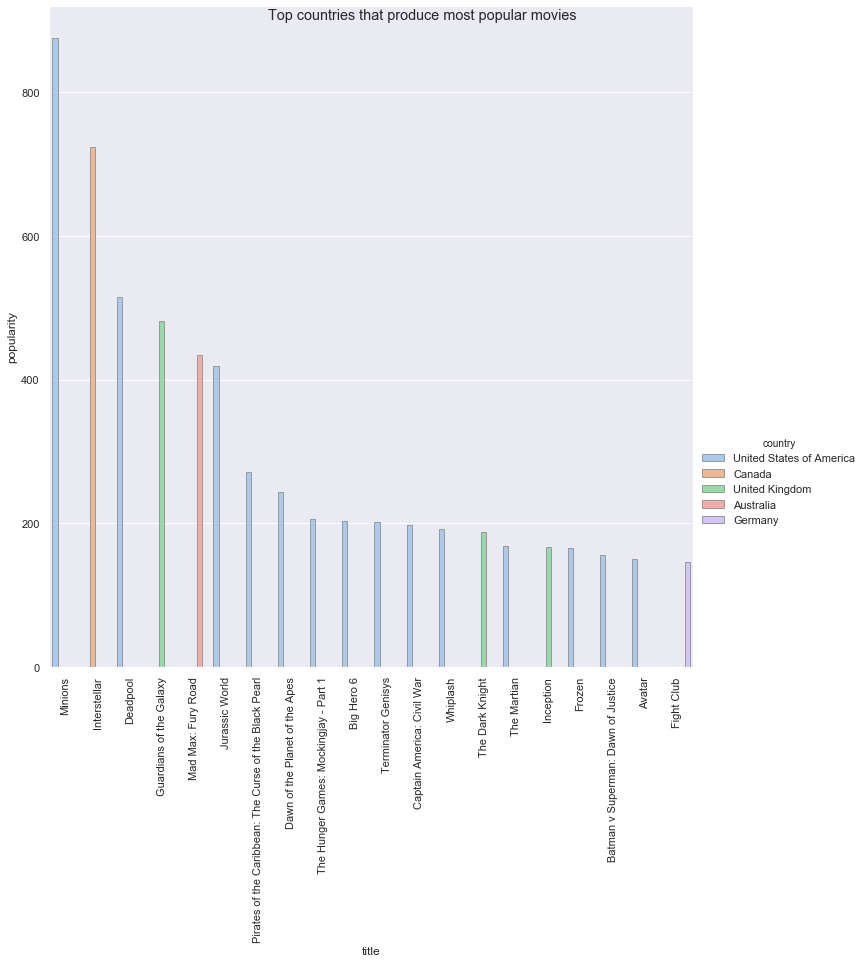

In [58]:
# Plot this relation for 20 country
# sorted_popularity[:20].plot(x="country", hue ="title",kind="bar")
g= sns.catplot(y="popularity", hue="country", x="title", kind="bar",
            palette="pastel", edgecolor=".6", height=10,
            data=sorted_popularity[:20])
g.set_xticklabels(rotation=90);
g.fig.suptitle("Top countries that produce most popular movies");

## Q4: The correlation between Movie properties

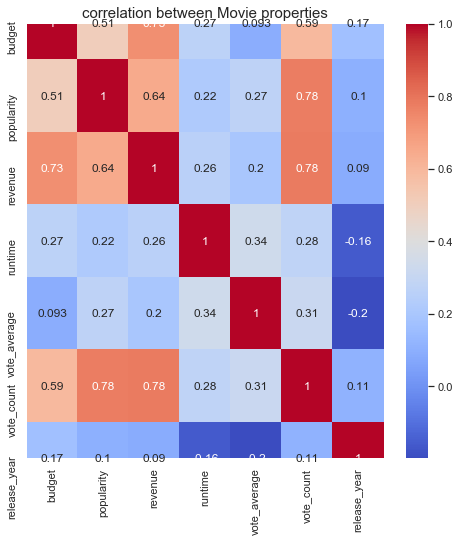

In [59]:
f = sns.heatmap(df.corr(), cmap="coolwarm",annot=True,)
sns.set(rc={'figure.figsize':(10,10)})
plt.title('correlation between Movie properties', fontsize =15);

A brief description of the above plot:
We are interested in revenue:
<li>seems to be increasing with popularity, with Correlation near to 0.64</li>
<li>also there is a quiet strong relation between it and budget, with Correlation = 0.73</li>
<li>The correlation between revenue and vote average is 0.2. So vote average is not highly related to the revenue.</li>
<li>The correlation between revenue and runtime is 0.26. So runtime is not highly related to the revenue.</li>



